In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

import tensorflow as tf
     

In [ ]:
data = pd.read_excel('agr.xlsx')

In [ ]:
data.head()

,year,state_name,dist_name,Area,Production,Yield,Crop,state_code,dist_code
0,1966,telangana,Hyderabad,42.0,52.0,1238.10,rice,20,55
1,1966,telangana,Nizamabad,125.0,265.0,2120.00,rice,20,56
2,1966,telangana,Medak,97.0,138.0,1422.68,rice,20,57
3,1966,telangana,Mahabubnagar,107.0,127.0,1186.92,rice,20,58
4,1966,telangana,Nalgonda,111.0,105.0,945.95,rice,20,59


In [ ]:
data.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       year state_name     dist_name    Area  Production    Yield       Crop  \
0     1966  telangana     Hyderabad   42.00       52.00  1238.10       rice   
1     1966  telangana     Nizamabad  125.00      265.00  2120.00       rice   
2     1966  telangana         Medak   97.00      138.00  1422.68       rice   
3     1966  telangana  Mahabubnagar  107.00      127.00  1186.92       rice   
4     1966  telangana      Nalgonda  111.00      105.00   945.95       rice   
...    ...        ...           ...     ...         ...      ...        ...   
2335  2017  telangana      Nalgonda   12.79       24.70  1931.66  groundnut   
2336  2017  telangana      Warangal   17.92       40.96  2285.58  groundnut   
2337  2017  telangana       Khammam    4.76        9.75  2046.68  groundnut   
2338  2017  telangana    Karimnagar    3.23        5.20  1612.06  groundnut   
2339  2017  telangana      Adilabad    1.46        3.26  2236.26  gr

In [ ]:
data.describe()

,year,Area,Production,Yield,state_code,dist_code
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.0,2340.000000
mean,1991.500000,71.782692,109.714581,1335.055338,20.0,59.000000
std,15.011539,70.053395,181.199587,1084.404146,0.0,2.582541
min,1966.000000,0.000000,0.000000,0.000000,20.0,55.000000
25%,1978.750000,20.480000,10.897500,532.605000,20.0,57.000000
50%,1991.500000,50.850000,37.750000,980.290000,20.0,59.000000
75%,2004.250000,103.700000,121.100000,1907.852500,20.0,61.000000
max,2017.000000,417.910000,1500.840000,7486.250000,20.0,63.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2340 non-null   int64  
 1   state_name  2340 non-null   object 
 2   dist_name   2340 non-null   object 
 3   Area        2340 non-null   float64
 4   Production  2340 non-null   float64
 5   Yield       2340 non-null   float64
 6   Crop        2340 non-null   object 
 7   state_code  2340 non-null   int64  
 8   dist_code   2340 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 164.7+ KB


In [ ]:

data.isnull().sum()

year          0
state_name    0
dist_name     0
Area          0
Production    0
Yield         0
Crop          0
state_code    0
dist_code     0
dtype: int64

In [ ]:
data.shape

(2340, 9)

In [ ]:

data.nunique()


year            52
state_name       1
dist_name        9
Area          1783
Production    1771
Yield         2177
Crop             5
state_code       1
dist_code        9
dtype: int64

In [ ]:

data['dist_name'].unique()

array(['Hyderabad', 'Nizamabad', 'Medak', 'Mahabubnagar', 'Nalgonda',
       'Warangal', 'Khammam', 'Karimnagar', 'Adilabad'], dtype=object)

In [ ]:
data.dtypes

year            int64
state_name     object
dist_name      object
Area          float64
Production    float64
Yield         float64
Crop           object
state_code      int64
dist_code       int64
dtype: object

In [ ]:
data.columns

Index(['year', 'state_name', 'dist_name', 'Area', 'Production', 'Yield',
       'Crop', 'state_code', 'dist_code'],
      dtype='object')

In [ ]:
numeric = ['year', 'Area', 'Production','Yield']

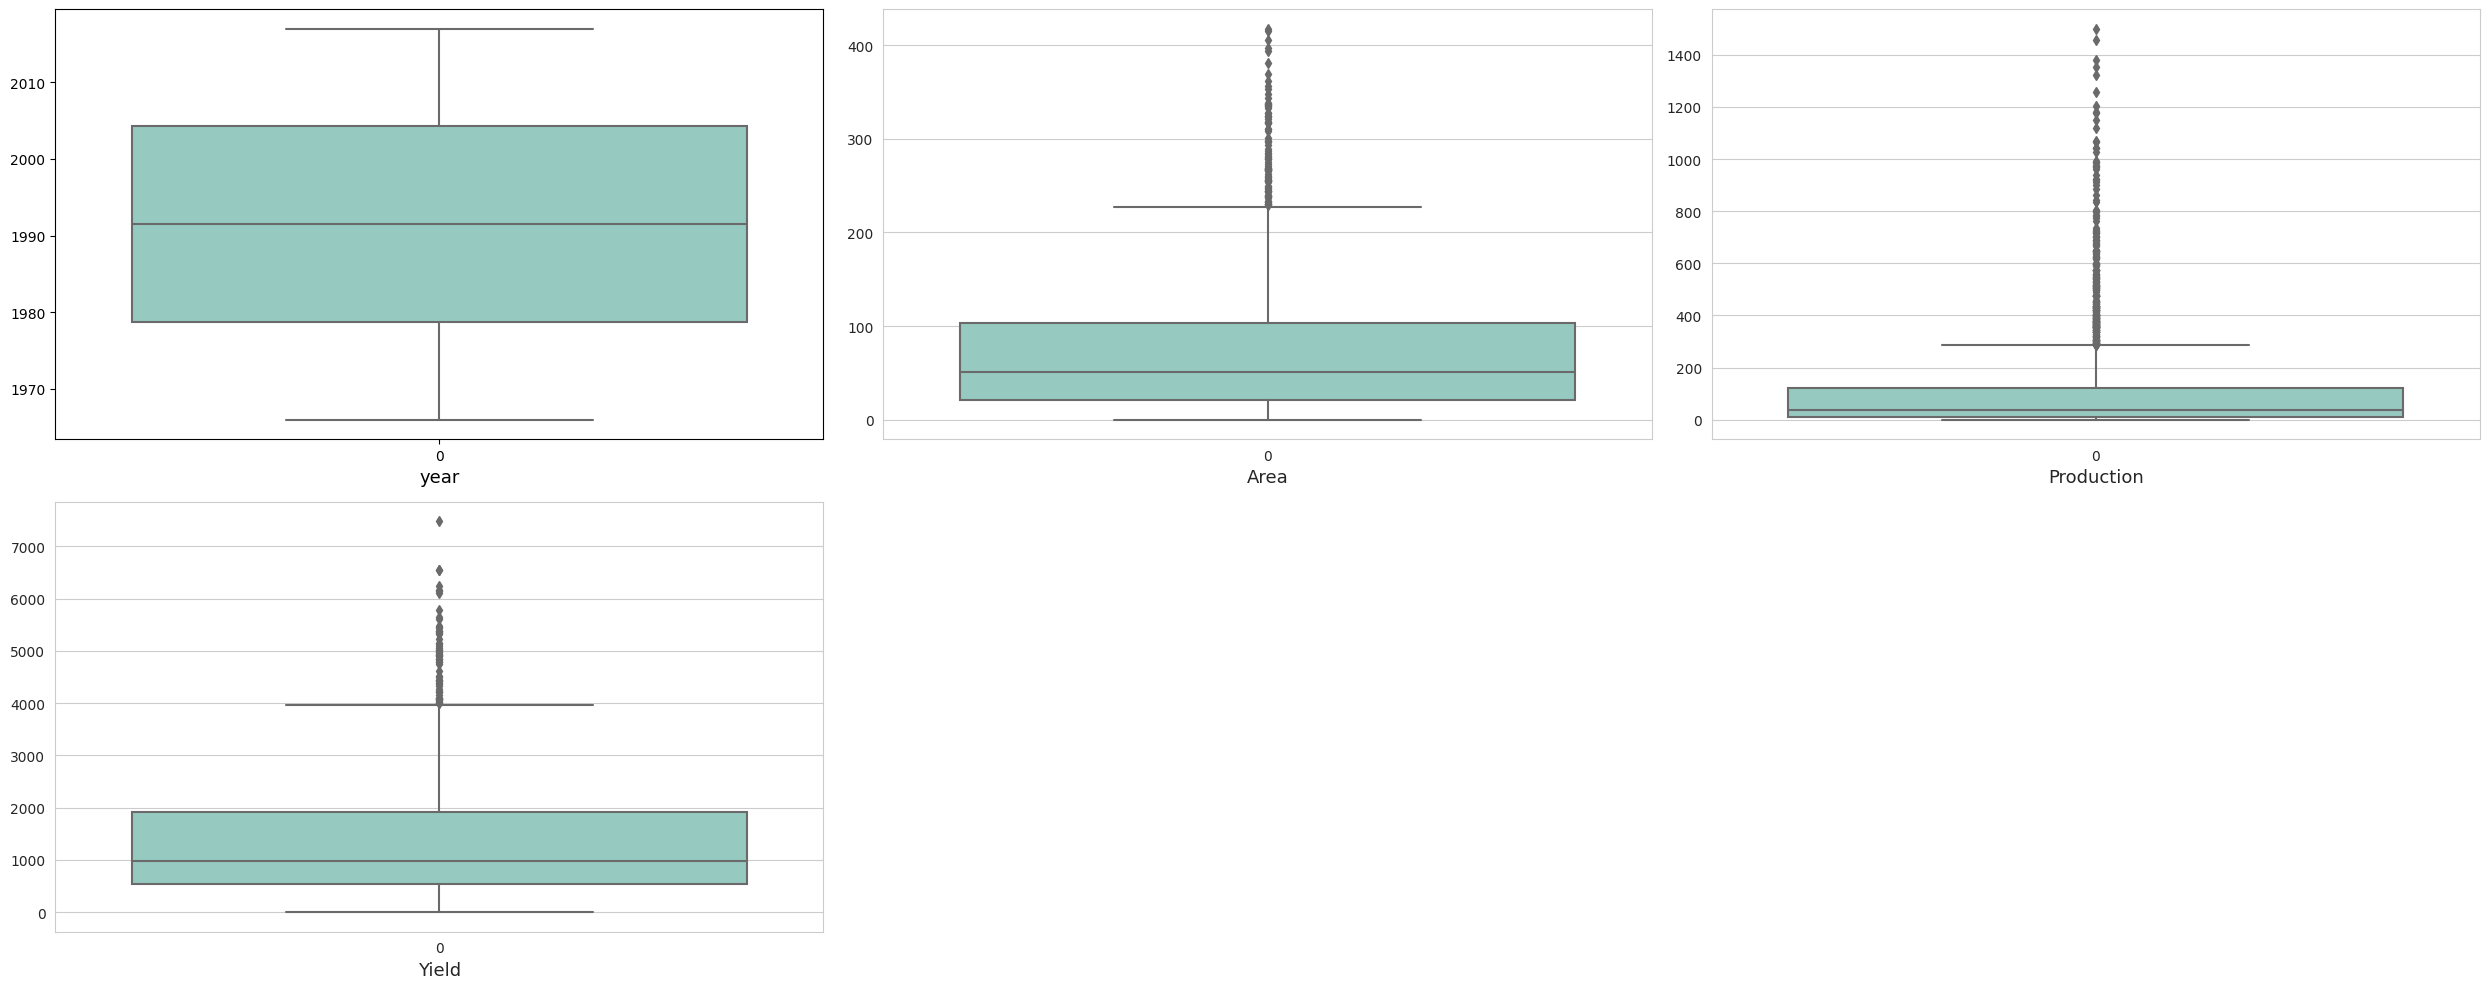

In [ ]:

plt.figure(figsize=(25, 10))

j = 1
for i in data[numeric].columns:
    plt.subplot(2, 3, j)
    sns.set_style('whitegrid')
    sns.boxplot(data[i],palette = 'Set3')
    plt.xlabel('{}'.format(i), fontsize=13)
    plt.tight_layout()
    j += 1

In [ ]:
numeric1 = ['Area','Production','Yield']

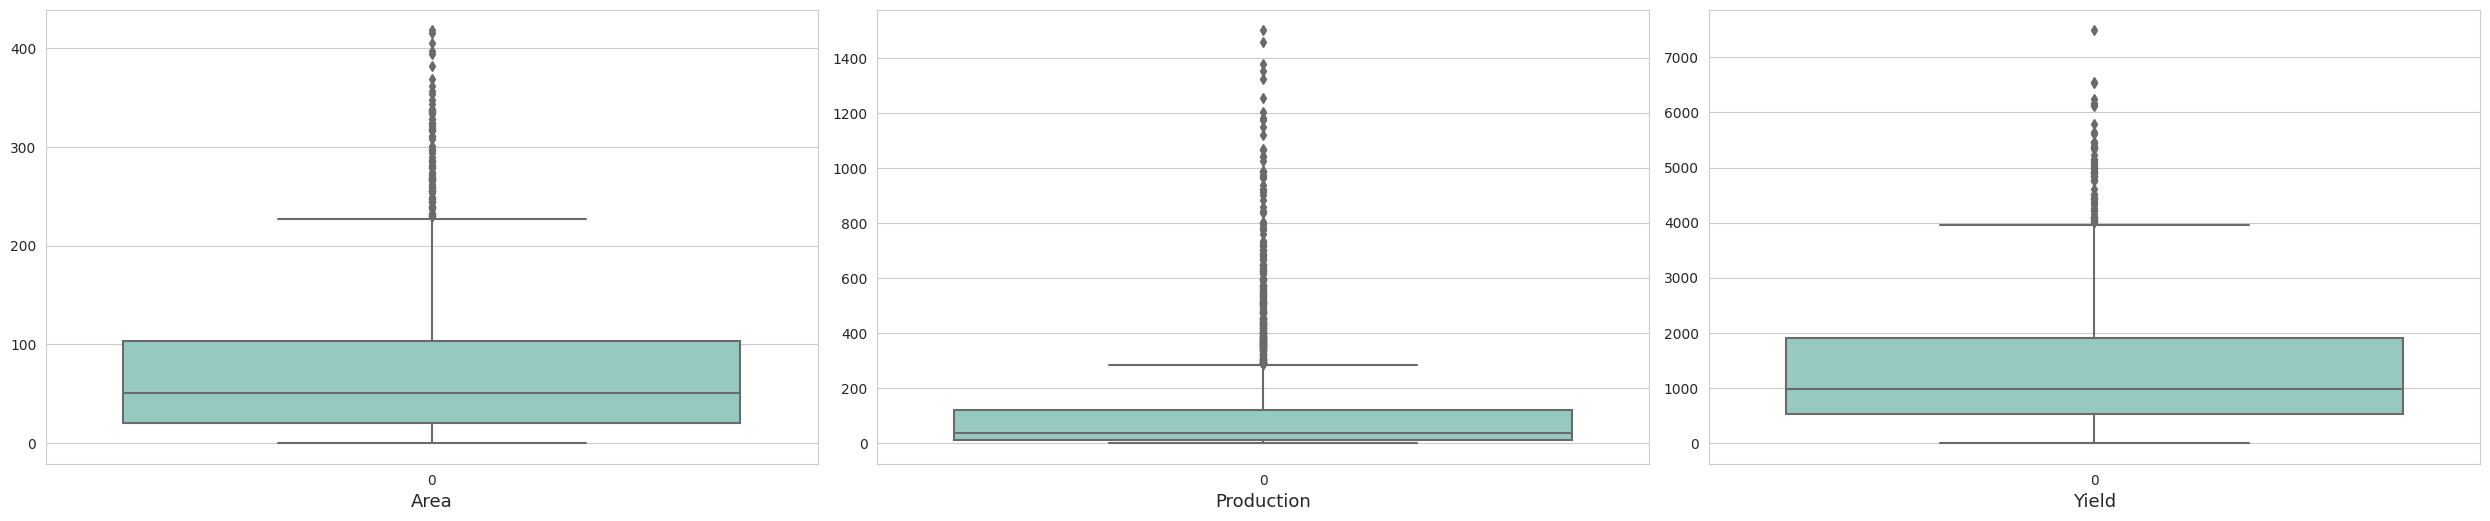

In [ ]:

plt.figure(figsize=(25, 10))

j = 1
for i in data[numeric1].columns:
    plt.subplot(2, 3, j)
    sns.set_style('whitegrid')
    sns.boxplot(data[i],palette = 'Set3')
    plt.xlabel('{}'.format(i), fontsize=13)
    plt.tight_layout()
    j += 1

In [ ]:
cols = [ 'Area','Production','Yield']

for col in cols:
    q1 = data[col].quantile(0.75)
    q2 = data[col].quantile(0.25)
    iqr = q1 - q2
    upper_limit = q1 + 1.5 * iqr
    lower_limit = q2 - 1.5 * iqr
    data = data[(data[col] > lower_limit) & (data[col] < upper_limit)]

In [ ]:
data[(data[col] > lower_limit) & (data[col] < upper_limit)]

,year,state_name,dist_name,Area,Production,Yield,Crop,state_code,dist_code
0,1966,telangana,Hyderabad,42.00,52.00,1238.10,rice,20,55
2,1966,telangana,Medak,97.00,138.00,1422.68,rice,20,57
3,1966,telangana,Mahabubnagar,107.00,127.00,1186.92,rice,20,58
4,1966,telangana,Nalgonda,111.00,105.00,945.95,rice,20,59
5,1966,telangana,Warangal,137.00,159.00,1160.58,rice,20,60
...,...,...,...,...,...,...,...,...,...
2335,2017,telangana,Nalgonda,12.79,24.70,1931.66,groundnut,20,59
2336,2017,telangana,Warangal,17.92,40.96,2285.58,groundnut,20,60
2337,2017,telangana,Khammam,4.76,9.75,2046.68,groundnut,20,61
2338,2017,telangana,Karimnagar,3.23,5.20,1612.06,groundnut,20,62


In [ ]:
data.shape

(1922, 9)

In [ ]:
data.head()

,year,state_name,dist_name,Area,Production,Yield,Crop,state_code,dist_code
0,1966,telangana,Hyderabad,42.0,52.0,1238.10,rice,20,55
2,1966,telangana,Medak,97.0,138.0,1422.68,rice,20,57
3,1966,telangana,Mahabubnagar,107.0,127.0,1186.92,rice,20,58
4,1966,telangana,Nalgonda,111.0,105.0,945.95,rice,20,59
5,1966,telangana,Warangal,137.0,159.0,1160.58,rice,20,60


In [ ]:
data.drop(['dist_code','state_code','state_name'],axis=1,inplace=True)

In [ ]:
data.head()

,year,dist_name,Area,Production,Yield,Crop
0,1966,Hyderabad,42.0,52.0,1238.10,rice
2,1966,Medak,97.0,138.0,1422.68,rice
3,1966,Mahabubnagar,107.0,127.0,1186.92,rice
4,1966,Nalgonda,111.0,105.0,945.95,rice
5,1966,Warangal,137.0,159.0,1160.58,rice


In [ ]:
dummies=pd.get_dummies(data.dist_name)

In [ ]:
merged=pd.concat([data,dummies],axis='columns')

In [ ]:
merged.head()

,year,dist_name,Area,Production,Yield,Crop,Adilabad,Hyderabad,Karimnagar,Khammam,Mahabubnagar,Medak,Nalgonda,Nizamabad,Warangal
0,1966,Hyderabad,42.0,52.0,1238.10,rice,0,1,0,0,0,0,0,0,0
2,1966,Medak,97.0,138.0,1422.68,rice,0,0,0,0,0,1,0,0,0
3,1966,Mahabubnagar,107.0,127.0,1186.92,rice,0,0,0,0,1,0,0,0,0
4,1966,Nalgonda,111.0,105.0,945.95,rice,0,0,0,0,0,0,1,0,0
5,1966,Warangal,137.0,159.0,1160.58,rice,0,0,0,0,0,0,0,0,1


In [ ]:
d1=merged.drop(['dist_name','Adilabad'],axis='columns')

In [ ]:
d1.head()

,year,Area,Production,Yield,Crop,Hyderabad,Karimnagar,Khammam,Mahabubnagar,Medak,Nalgonda,Nizamabad,Warangal
0,1966,42.0,52.0,1238.10,rice,1,0,0,0,0,0,0,0
2,1966,97.0,138.0,1422.68,rice,0,0,0,0,1,0,0,0
3,1966,107.0,127.0,1186.92,rice,0,0,0,1,0,0,0,0
4,1966,111.0,105.0,945.95,rice,0,0,0,0,0,1,0,0
5,1966,137.0,159.0,1160.58,rice,0,0,0,0,0,0,0,1


In [ ]:
dummies1=pd.get_dummies(d1.Crop)

In [ ]:
merged1=pd.concat([d1,dummies1],axis='columns')

In [ ]:
merged1.head()

,year,Area,Production,Yield,Crop,Hyderabad,Karimnagar,Khammam,Mahabubnagar,Medak,Nalgonda,Nizamabad,Warangal,groundnut,maize,minor_pulses,rice,sorghum
0,1966,42.0,52.0,1238.10,rice,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1966,97.0,138.0,1422.68,rice,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1966,107.0,127.0,1186.92,rice,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1966,111.0,105.0,945.95,rice,0,0,0,0,0,1,0,0,0,0,0,1,0
5,1966,137.0,159.0,1160.58,rice,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
d2=merged1.drop(['Crop','rice'],axis='columns')

In [ ]:
d2.head()

,year,Area,Production,Yield,Hyderabad,Karimnagar,Khammam,Mahabubnagar,Medak,Nalgonda,Nizamabad,Warangal,groundnut,maize,minor_pulses,sorghum
0,1966,42.0,52.0,1238.10,1,0,0,0,0,0,0,0,0,0,0,0
2,1966,97.0,138.0,1422.68,0,0,0,0,1,0,0,0,0,0,0,0
3,1966,107.0,127.0,1186.92,0,0,0,1,0,0,0,0,0,0,0,0
4,1966,111.0,105.0,945.95,0,0,0,0,0,1,0,0,0,0,0,0
5,1966,137.0,159.0,1160.58,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()

In [ ]:
x=d2.drop(['Yield'],axis=1)

In [ ]:
y=d2['Yield']

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=365)

In [ ]:
# Scale the training data with StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-1.61444238,  1.68968065, -0.18042973, ..., -0.45643546,
        -0.56507814, -0.52187258],
       [-0.93961767,  1.15376342, -0.47110035, ..., -0.45643546,
         1.76966676, -0.52187258],
       [-0.46724038,  0.65008804,  0.10932395, ..., -0.45643546,
        -0.56507814,  1.91617654],
       ...,
       [ 0.67996163, -1.01863377, -0.76415502, ..., -0.45643546,
        -0.56507814, -0.52187258],
       [-1.20954756, -0.02575049, -0.52336605, ...,  2.19089023,
        -0.56507814, -0.52187258],
       [-0.66968779, -1.07981059, -0.84062798, ...,  2.19089023,
        -0.56507814, -0.52187258]])

In [ ]:
y_test

39       281.48
484      203.08
780      635.18
2197    2852.27
2329     917.64
         ...   
1932    1600.00
1437    1210.53
1574    1558.08
290      371.15
652     2000.00
Name: Yield, Length: 385, dtype: float64

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = model.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
msle_lr = mean_squared_error(y_test, y_pred_lr)
rmsle_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr

196.1259481280856

In [ ]:
r2_lr

0.8134173954609974

In [ ]:
from sklearn import linear_model

model=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)



In [ ]:
model.fit(x_train,y_train)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
y_pred = model.predict(x_test)
r2=r2_score(y_test, y_pred)
r2


0.7595243663628044

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbc=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)
     

GradientBoostingRegressor(learning_rate=0.05, max_features=5, n_estimators=1000,
                          random_state=100)

In [ ]:
y_pred = gbc.predict(x_test)
mae_gbr = mean_absolute_error(y_test, y_pred)
msle_gbr = mean_squared_error(y_test, y_pred)
rmsle_gbr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gbr = r2_score(y_test, y_pred)
r2_gbr    

0.9518024940785462

In [ ]:
#Ada boost

from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abr=AdaBoostRegressor(n_estimators=1000,learning_rate=0.05,random_state=100)
abr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=1000, random_state=100)

In [ ]:

y_pred = abr.predict(x_test)
mae_ab = mean_absolute_error(y_test, y_pred)
msle_ab = mean_squared_error(y_test, y_pred)
rmsle_ab = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ab = r2_score(y_test, y_pred)
r2_ab

0.7347104572301085

In [ ]:
#XG boosting
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from xgboost import XGBRegressor 

In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=1000,random_state=100)
clf.fit(x_train, y_train)
predicted=clf.predict(x_test)


In [ ]:
y_pred = clf.predict(x_test)

     

In [ ]:

mae_xgb = mean_absolute_error(y_test, y_pred)
msle_xgb = mean_squared_error(y_test, y_pred)
rmsle_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)
r2_xgb


0.9593054792681688

In [ ]:
#Bagging

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [ ]:
clfbg = BaggingRegressor(n_estimators = 1000, random_state =100)
clfbg.fit(x_train, y_train)
predictbg= clfbg.predict(x_test)

In [ ]:
maebg = metrics.mean_absolute_error(y_test, predictbg)
msebg = metrics.mean_squared_error(y_test,predictbg)
rmsebg = np.sqrt(msebg)   
r2bg = metrics.r2_score(y_test,predictbg)
r2bg    

0.9303912565284527

In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:

regression_model = DecisionTreeRegressor(criterion="squared_error",min_samples_leaf=5) 
regression_model.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [ ]:
predicted = regression_model.predict(x_test)
mae_dt = mean_absolute_error(y_test, predicted)
msle_dt = mean_squared_error(y_test, predicted)
rmsle_dt = np.sqrt(mean_squared_error(y_test, predicted))
r2_dt = r2_score(y_test, predicted)
r2_dt

0.8878457589116282

In [ ]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
predicted = regressor.predict(x_test)
mae_rf = mean_absolute_error(y_test, predicted)
msle_rf = mean_squared_error(y_test, predicted)
rmsle_rf = np.sqrt(mean_squared_error(y_test, predicted))
r2_rf = r2_score(y_test, predicted)
r2_rf

0.9170434254693332

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
predicted = knn.predict(x_test)

In [ ]:
mae_knn = mean_absolute_error(y_test, predicted)
msle_knn = mean_squared_error(y_test, predicted)
rmsle_knn = np.sqrt(mean_squared_error(y_test, predicted))
r2_knn = r2_score(y_test, predicted)
r2_knn

0.8764332775695994

In [ ]:
#SVM
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:

y_pred = regressor.predict(x_test)

In [ ]:

mae_svm = mean_absolute_error(y_test, y_pred)
msle_svm = mean_squared_error(y_test, y_pred)
rmsle_svm = np.sqrt(mean_squared_error(y_test, y_pred))
r2_svm = r2_score(y_test, y_pred)
r2_svm

0.741715840174008

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(18),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs=200)

Epoch 1/200
49/49 [==============================] - 2s 2ms/step - loss: 995.2502 - mse: 995.2502 - rmse: 1196.7920 - mae: 995.2502
Epoch 2/200
49/49 [==============================] - 0s 2ms/step - loss: 993.2422 - mse: 993.2422 - rmse: 1195.1630 - mae: 993.2422
Epoch 3/200
49/49 [==============================] - 0s 2ms/step - loss: 984.2241 - mse: 984.2241 - rmse: 1187.7802 - mae: 984.2241
Epoch 4/200
49/49 [==============================] - 0s 2ms/step - loss: 940.2540 - mse: 940.2540 - rmse: 1151.4525 - mae: 940.2540
Epoch 5/200
49/49 [==============================] - 0s 2ms/step - loss: 783.2567 - mse: 783.2567 - rmse: 1017.8731 - mae: 783.2567
Epoch 6/200
49/49 [==============================] - 0s 2ms/step - loss: 457.2560 - mse: 457.2560 - rmse: 671.7782 - mae: 457.2560
Epoch 7/200
49/49 [==============================] - 0s 2ms/step - loss: 237.1558 - mse: 237.1558 - rmse: 342.7664 - mae: 237.1558
Epoch 8/200
49/49 [==============================] - 0s 2ms/step - loss: 227.3

In [ ]:
nn = model.evaluate(x_test,y_test)
nn
   

13/13 [==============================] - 0s 3ms/step - loss: 192.6360 - mse: 192.6360 - rmse: 287.0175 - mae: 192.6360


[192.6360321044922, 192.6360321044922, 287.0175476074219, 192.6360321044922]

In [ ]:
y_prednn=model.predict(x_test)
r2nn = metrics.r2_score(y_test,y_prednn)
r2nn

13/13 [==============================] - 0s 3ms/step


0.7935082202522603

<Axes: >

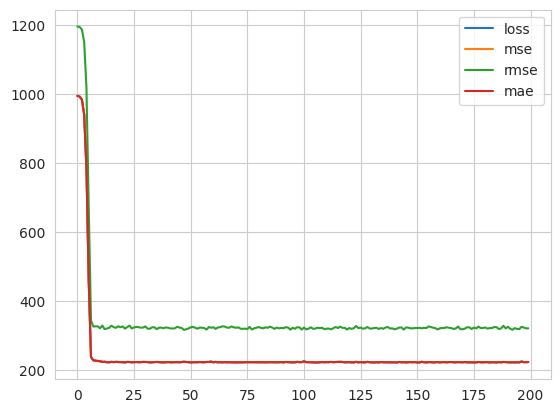

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
data = {'Linear regression' : [mae_lr,msle_lr,rmsle_lr,r2_lr],
       'Decision Tree Regressor': [mae_dt,msle_dt,rmsle_dt,r2_dt],
       'Random Forest Regressor': [mae_rf,msle_rf,rmsle_rf,r2_rf],
       'XGBRegressor': [mae_xgb,msle_xgb,rmsle_xgb,r2_xgb],
        'Bagging':[maebg,msebg,rmsebg,r2bg],
       'Gradient Boosting Regressor': [mae_gbr,msle_gbr,rmsle_gbr,r2_gbr],
        'Ada Boost Regressor': [mae_ab,msle_ab,rmsle_ab,r2_ab],
        'K-Nearest Neighbours':[mae_knn,msle_knn,rmsle_knn,r2_knn],
        'SVM' : [mae_svm,msle_svm,rmsle_svm,r2_svm],
        'Neural Network':[nn[3],nn[1],nn[2],r2nn]}

eval_metrics = pd.DataFrame(data, index=['MAE','MSE','RMSE','R^2'])

eval_metrics

,Linear regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor,Bagging,Gradient Boosting Regressor,Ada Boost Regressor,K-Nearest Neighbours,SVM,Neural Network
MAE,196.125948,147.758983,111.028410,81.349299,102.491935,85.880218,268.570950,160.283509,207.888894,192.636032
MSE,74436.385568,44743.486958,33095.194391,16234.916664,27770.130451,19228.202667,105836.204514,49296.450850,103041.434942,192.636032
RMSE,272.830324,211.526563,181.920846,127.416312,166.643723,138.665795,325.324768,222.028041,321.000677,287.017548
R^2,0.813417,0.887846,0.917043,0.959305,0.930391,0.951802,0.734710,0.876433,0.741716,0.793508


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# create a CNN regression model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(loss='mse', optimizer='adam')

# fit the model to the training data
model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

# make predictions on the testing data
y_pred = model.predict(x_test)

# evaluate the performance of the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared score: {:.2f}".format(r2))


13/13 [==============================] - 0s 2ms/step
Mean Absolute Error: 58.90
Mean Squared Error: 15415.68
Root Mean Squared Error: 124.16
R-squared score: 0.96


In [ ]:
#predictions
regressor =XGBRegressor( 
                           n_estimators=1000,
                           learning_rate=0.1,
                           random_state=365)
# fit model
regressor.fit(x_train, y_train)
# define input
new_input = [[2023,90,50,1,0,0,0,0,0,0,0,1,0,0,0]]
# get prediction for new input
new_output = regressor.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[2023, 90, 50, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]] [1557.2341]


In [ ]:
# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2509)
# define model
from sklearn.linear_model import LinearRegression
regressor = AdaBoostRegressor( 
                           n_estimators=1000,
                           learning_rate=0.1,
                           random_state=0)
# fit model
regressor.fit(X_train, y_train)
# define input
new_input = [[86877861,28959287,1007243596,335747865.3]]
# get prediction for new input
new_output = regressor.predict(new_input)
# summarize input and output
print(new_input, new_output)

NameError: ignored

In [ ]:
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import GridSearchCV
#def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            
            }
        },
        'lasso': {
            'model': linear_model.Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                "splitter":["best","random"],
                "max_depth" : [1,3,5,7,9,11,12],
                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }
        },
        'gbr':{
              'model': GradientBoostingRegressor(),
               'params': {
                    'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9],
                    'subsample'    : [0.9, 0.5, 0.2, 0.1,0.3,0.4,0.6,0.8,0.7],
                    'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
                    'max_depth'    : [4,6,8,10]
            }
        },
        
        'xgb': {
           'model': XGBRegressor(),
           'params': {
               'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9],
               'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
               'max_depth'    : [4,6,8,10],
               'gamma': [0.01,0.1]
            }
        },
        'ada_boost': {
            'model': AdaBoostRegressor(),
            'params':{
                'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
                'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9]
            }
        },
       'bagging': {
           'model': BaggingRegressor(),
           'params':{
               'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500]
           }
       },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params':{
                "max_depth" : [1,3,5,7,9,11,12],
                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)